# Welcome to Machine Learning - Week 4
Instructor - Daniel Wiesenfeld


# Unsupervised Learning
- **Definition**: A type of machine learning that looks for previously undetected patterns in a dataset with no pre-existing labels.
- **Applications**: Market segmentation, anomaly detection, gene sequence analysis, etc.

---

## Key Algorithms
1. K-centroids (e.g., K-Means)
2. EM Algorithm (Gaussian Mixture Models)
3. Hierarchical Clustering
4. DBSCAN
5. Principal Component Analysis (PCA)

If we have time:

6. t-SNE
7. Anomaly Detection
8. Not covering association learning this course


## Clustering Algorithms

Algorithms that attempt to logically group samples from a dataset (rows)

The goal can be to add structure to the data set to increase understanding, to aid in visualization, or to use as features for supervised learning.

Sometimes, the clusters alone can effectively predict a target even through the target was not used at all in training.


### Let's look at Some 2D Clustering Data Sets
*Note: These algorithms are often more useful for higher dimensional datasets, but that is difficult to visualize*


In [2]:
import numpy as np
from sklearn import datasets
n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

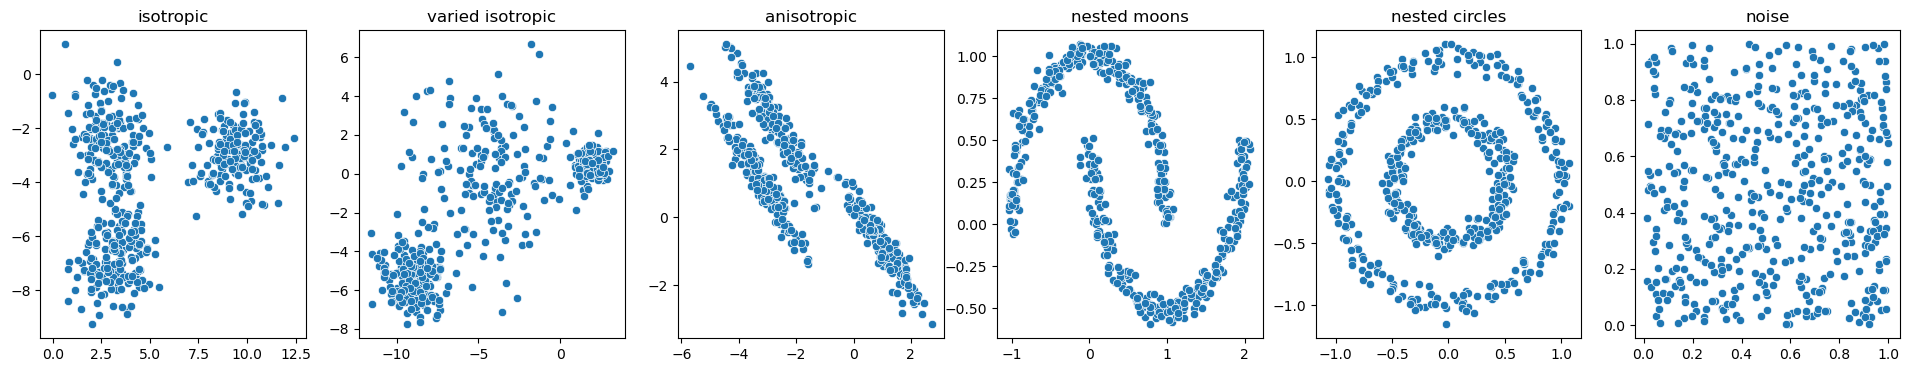

In [6]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(1, 6, figsize = (24, 4))
Xs = {'isotropic': [blobs[0], 3], 'varied isotropic': [varied[0], 3], 'anisotropic': [aniso[0], 3],
      'nested moons': [noisy_moons[0], 2], 'nested circles': [noisy_circles[0], 2], 'noise': [no_structure[0], 3]}
for ax, (title, (X, c)) in zip(axs, Xs.items()):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], ax = ax)
    ax.set_title(title)


### K-Means Clustering
- **Objective**: Partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean.
- **Algorithm Steps**:
  1. Initialize k centroids randomly.
  2. Assign each point to the nearest centroid.
      - Euclidean distance: $d(p, q)  = \sqrt{\sum_i (p_i - q_i)^2}$
      - Manhattan distance: $d(p, q)  = \sum_i |p_i - q_i|$
  3. Update centroids as the mean of assigned points.
  4. Repeat until convergence (no change in centroids).
---
#### Pros and Cons
- **Pros**: Simple, scalable, and efficient for large datasets.
- **Cons**: Requires specification of k, sensitive to initial centroid placement, and assumes spherical clusters.
---
#### Cool Visualization
https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

#### Example Code

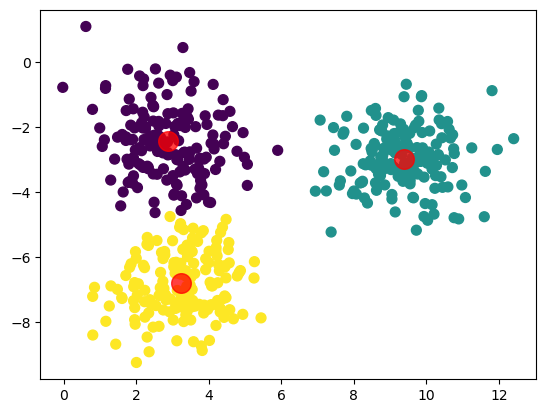

In [7]:
# Generate sample data
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X = Xs['isotropic'][0]
# K-Means clustering
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters=3, n_init = 'auto')
y_kmeans = kmeans.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()


#### How to determine k:  Elbow Method:
- Try each value of k from 1 to maximum that you're willing to try:
- For each value of k, measure and compute distortion (sum of square distances between each point and its cluster's centroid)
- Graph distortion vs k
- Pick the k with the "elbow"

By definition, distortion will always decrease as k increases (until k = number of samples), but if there is a natural number of clusters, there will be a noticable "elbow" in the graph at the point when increasing k stops helping as much. That point is often the chosen k.

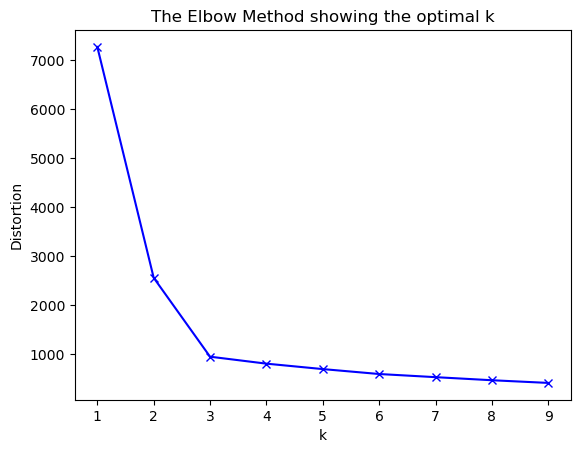

In [8]:
# Elbow Method
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the Elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


#### Let's see How K-means clustered our six datasets

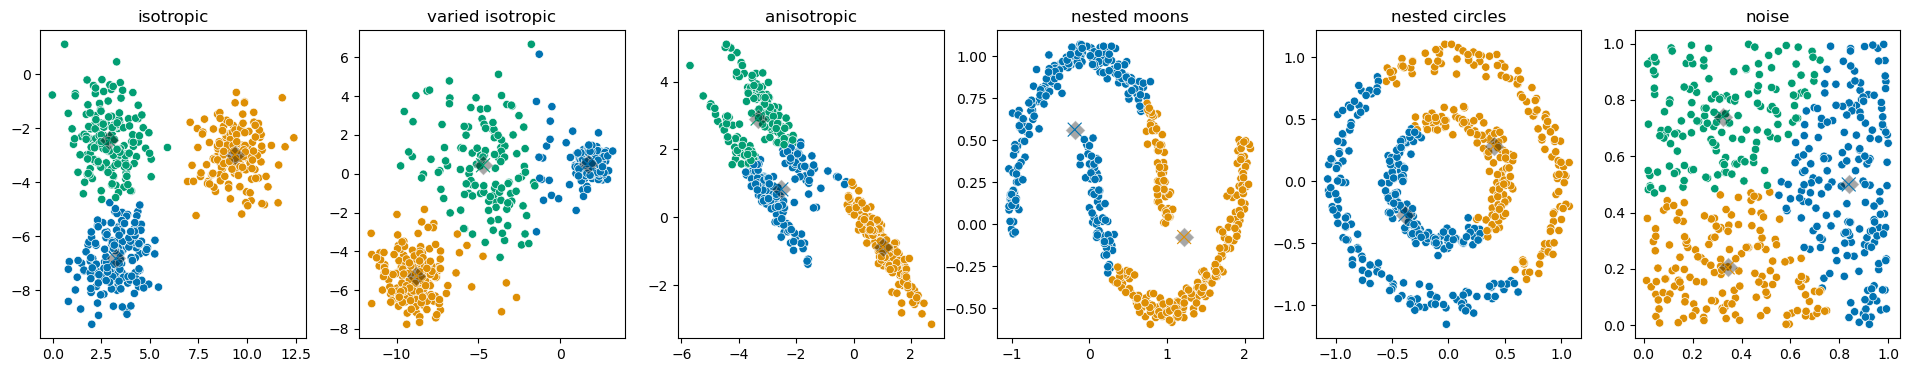

In [9]:
fig, axs = plt.subplots(1, 6, figsize = (24, 4))
for ax, (title, (X, k)) in zip(axs, Xs.items()):
    kmeans = KMeans(n_clusters=k, n_init = 'auto')
    y_kmeans = kmeans.fit_predict(X)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, ax=ax, palette = 'colorblind', legend = None)
    centers = kmeans.cluster_centers_
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], c = 'black', s=100, alpha=0.35, 
                    palette = 'colorblind', ax=ax, legend = None, marker = 'D')
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], hue=np.arange(len(centers)), s=100, alpha=1, 
                    palette = 'colorblind', ax=ax, legend = None, marker = 'x')
    ax.set_title(title)


### Gaussian Mixture Models (GMM)
- **Objective**: Model the data as a mixture of several Gaussian distributions.
- **Algorithm Steps**:
  1. Initialize parameters (means, covariances, and mixture weights).
  2. Expectation Step: Compute responsibilities (posterior probabilities).
  3. Maximization Step: Update parameters using responsibilities.
  4. Repeat until convergence.

---

#### Pros and Cons
- **Pros**: Can model non-spherical clusters and provide probabilistic cluster memberships.
- **Cons**: Computationally expensive and sensitive to initialization.

#### Example Code

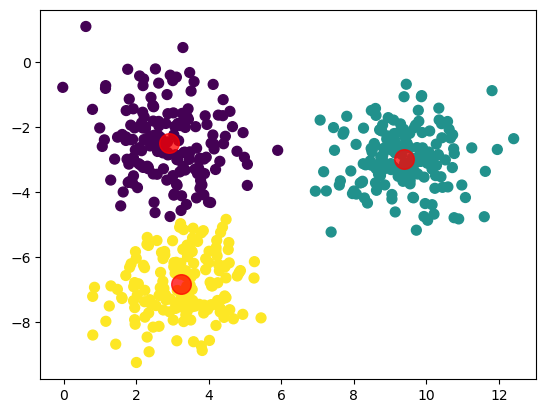

In [10]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = Xs['isotropic'][0]

# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
y_gmm = gmm.predict(X)
centers = gmm.means_
# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.show()

### Probabilistic Cluster Membership

In [11]:
gmm.predict_proba(X)

array([[8.39419780e-01, 1.37432389e-06, 1.60578845e-01],
       [7.69879842e-05, 9.99922949e-01, 6.30007976e-08],
       [7.57540225e-15, 1.00000000e+00, 9.05688925e-16],
       ...,
       [1.00000000e+00, 3.85532537e-13, 1.42440646e-10],
       [9.99999970e-01, 1.03764234e-11, 3.00091526e-08],
       [7.96709723e-11, 1.00000000e+00, 6.62535529e-11]])

#### Let's see How GMM clustered our six datasets

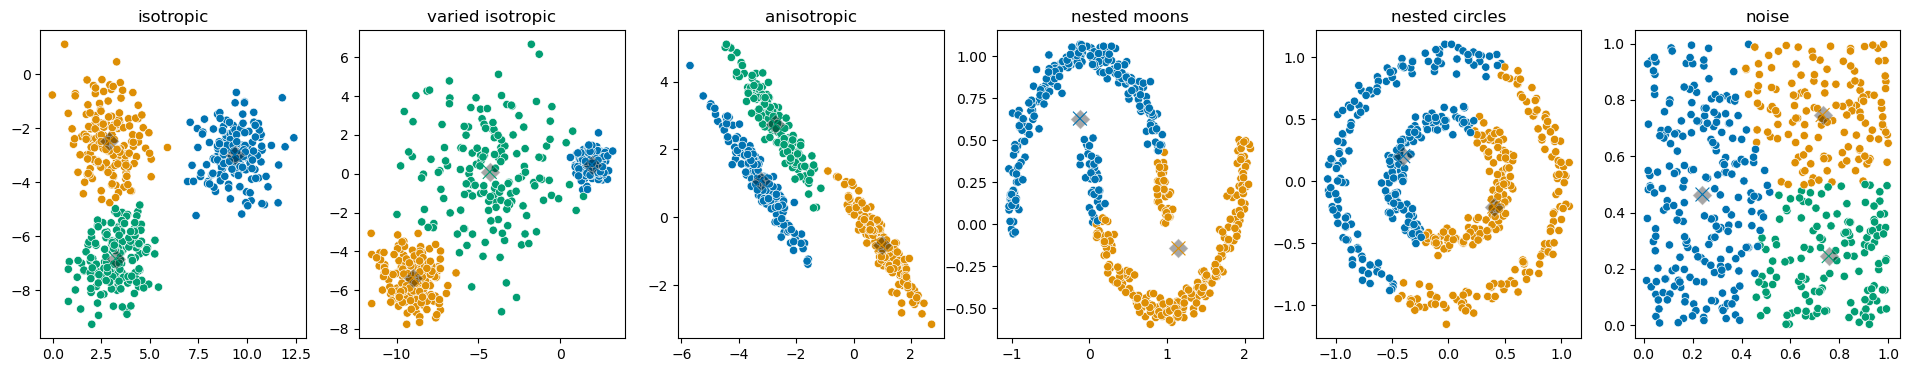

In [12]:
fig, axs = plt.subplots(1, 6, figsize = (24, 4))
for ax, (title, (X, k)) in zip(axs, Xs.items()):
    gmm = GaussianMixture(n_components=k)
    gmm.fit(X)
    y_gmm = gmm.predict(X)
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_gmm, ax=ax, palette = 'colorblind', legend = None)
    centers = gmm.means_
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], c = 'black', s=100, alpha=0.35, 
                    palette = 'colorblind', ax=ax, legend = None, marker = 'D')
    sns.scatterplot(x=centers[:, 0], y=centers[:, 1], hue=np.arange(len(centers)), s=100, alpha=1, 
                    palette = 'colorblind', ax=ax, legend = None, marker = 'x')
    ax.set_title(title)


### Hierarchical Clustering
- **Objective**: Build a hierarchy of clusters using either a top-down (divisive) or bottom-up (agglomerative) approach.
- **Algorithm Steps (Agglomerative)**:
  1. Assign each point to its own cluster.
  2. Merge the closest pair of clusters.
  3. Repeat until all points are in a single cluster.

---

#### Pros and Cons
- **Pros**: No need to specify the number of clusters in advance, produces a dendrogram.
- **Cons**: Computationally expensive, not suitable for large datasets.

#### Example Code

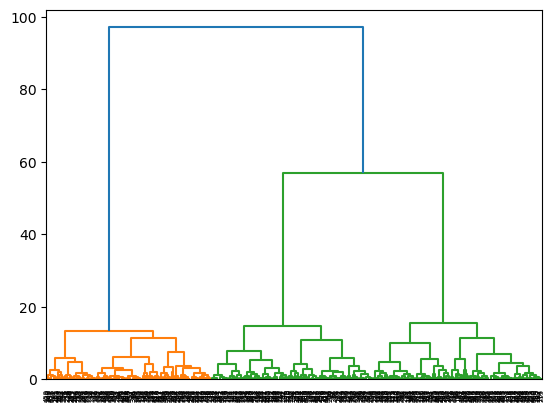

In [13]:

from scipy.cluster.hierarchy import dendrogram, linkage

# Generate sample data
X, _ = make_blobs(n_samples=150, centers=3, cluster_std=0.60, random_state=0)
X = Xs['isotropic'][0]

# Hierarchical Clustering
Z = linkage(X, 'ward')
dendrogram(Z)
plt.show()


#### Let's see How Hierarchical (ward) clusters our six datasets

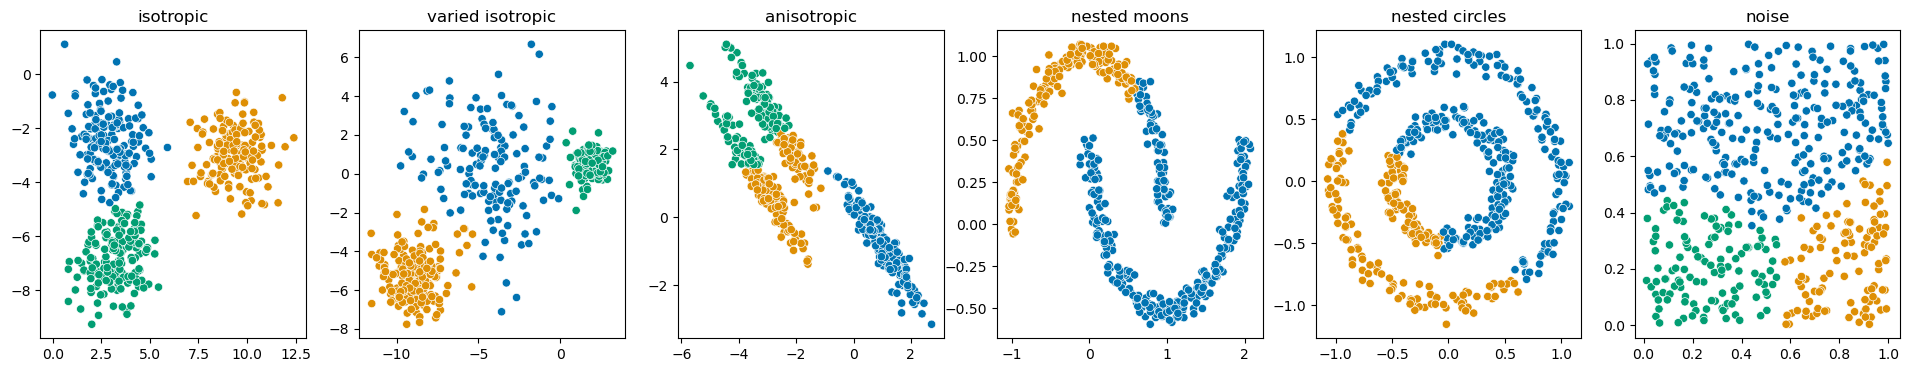

In [14]:
from sklearn.cluster import AgglomerativeClustering
fig, axs = plt.subplots(1, 6, figsize = (24, 4))
for ax, (title, (X, k)) in zip(axs, Xs.items()):
    hier = AgglomerativeClustering(n_clusters=k, linkage="ward")
    hier.fit(X)
    y_hier = hier.labels_.astype(int)
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_hier, ax=ax, palette = 'colorblind', legend = None)
    ax.set_title(title)


### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- **Objective**: Group together points that are closely packed together and mark as outliers points that lie alone in low-density regions.
- **Algorithm Steps**:
  1. Set hyperparameters epsilon and min_pts
  2. Identify core points, and noise.
      - If a point has at least min_pts other points within a distance of epsilon, it is a core point
      - Else it is noise
  2. Expand clusters from core points.
  
      A. Pick a core point to start a cluster
      
      B. Find all points within epsilon distance to the cluster and add them if they also have min_pts within epsilon, add them to the cluster
      
      C. Visit all points added to the cluster and repeat B & C until no more points can be added
      
      D. If there are core points that have not been clustered, repeat A-C to create a new cluster. Repeat this until all core points have been clustered. 

---

#### Pros and Cons
- **Pros**: Can find arbitrarily shaped clusters, no need to specify the number of clusters.
- **Cons**: Sensitive to parameters (epsilon and min_samples).

#### Super Cool Visualization:
https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

#### Example Code

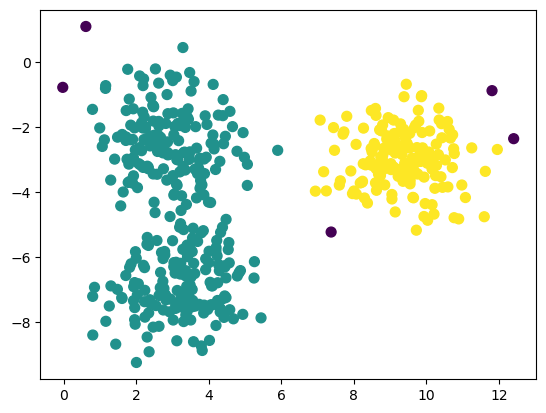

In [15]:

from sklearn.cluster import DBSCAN

# Generate sample data
X, _ = make_blobs(n_samples=150, centers=3, cluster_std=0.60, random_state=0)
X = Xs['isotropic'][0]

# DBSCAN
dbscan = DBSCAN(eps=1, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.show()


#### Let's see How DBSCAN clusters our six datasets

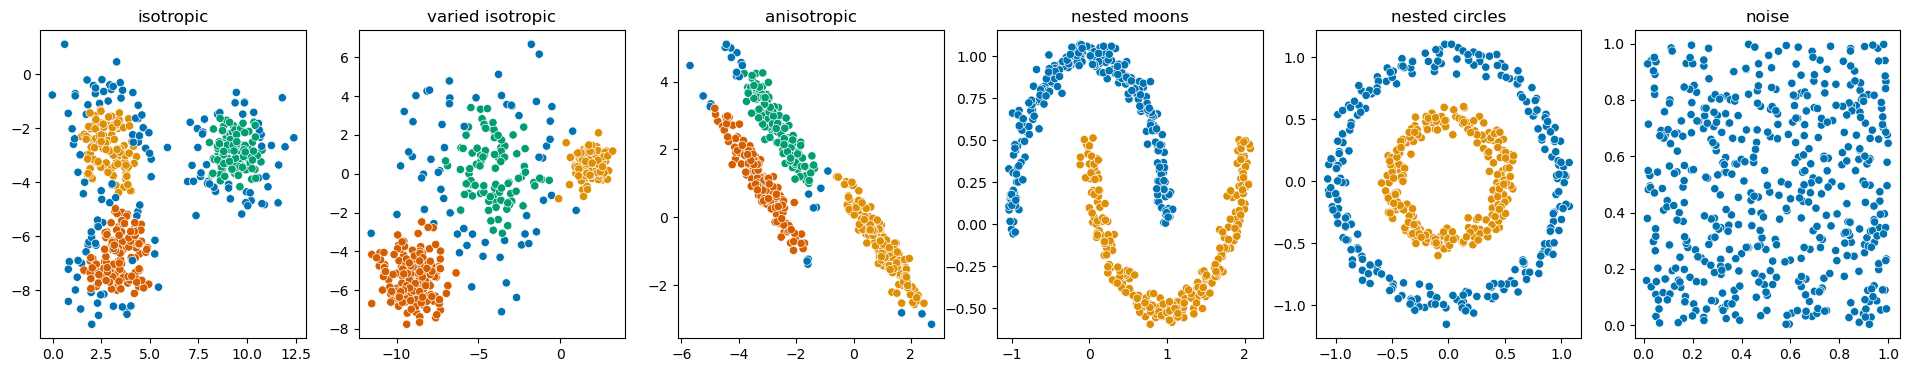

In [20]:
fig, axs = plt.subplots(1, 6, figsize = (24, 4))
eps = {'isotropic': .45, 'varied isotropic': 1.05, 'anisotropic': .4, 'nested moons': .3, 'nested circles': .2, 'noise': .3}
for ax, (title, (X, k)) in zip(axs, Xs.items()):
    dbscan = DBSCAN(eps = eps[title], min_samples = 9)
    dbscan.fit(X)
    y_dbscan = dbscan.labels_.astype(int)
    
    
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_dbscan, ax=ax, palette = 'colorblind', legend = None)
    ax.set_title(title)

HDBSCAN tries DBSCAN at many different EPS values and combines result to help with clusters of various densities.

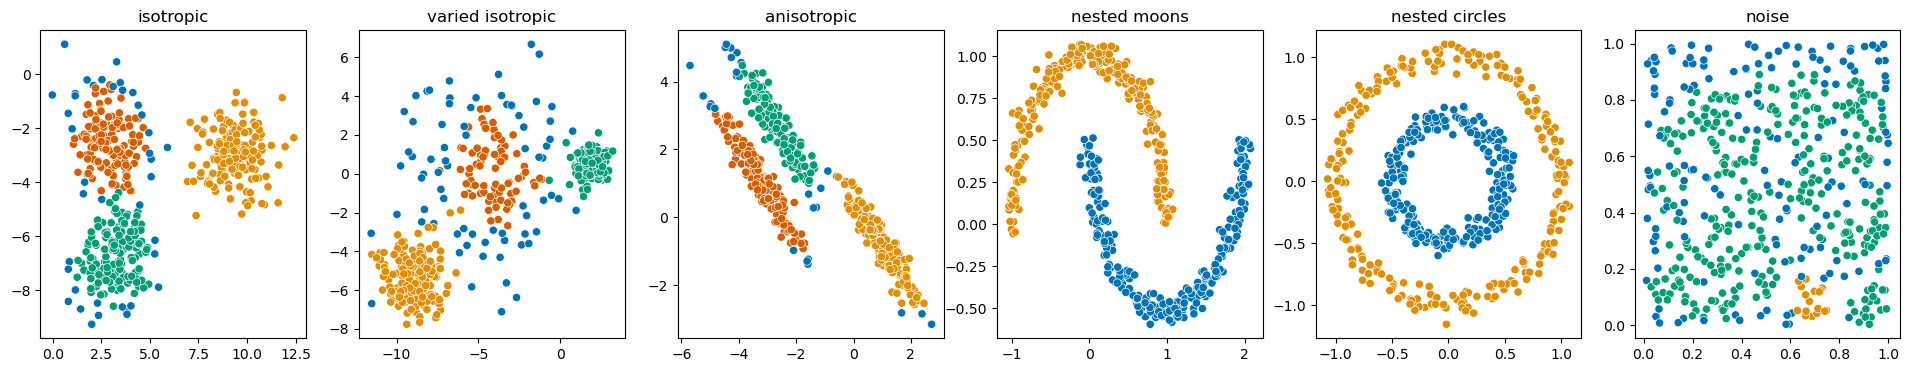

In [21]:
from hdbscan import HDBSCAN
fig, axs = plt.subplots(1, 6, figsize = (24, 4))

for ax, (title, (X, k)) in zip(axs, Xs.items()):
    hdbscan = HDBSCAN(cluster_selection_epsilon = eps[title], min_samples = 9)
    hdbscan.fit(X)
    y_hdbscan = hdbscan.labels_.astype(int)
    
    eps = {'isotropic': .04, 'varied isotropic': 1.05, 'anisotropic': .4, 'nested moons': .3, 'nested circles': .2, 'noise': .3}
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_hdbscan, ax=ax, palette = 'colorblind', legend = None)
    ax.set_title(title)


## Evaluation Metrics for Clustering
- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters.
- **Davies-Bouldin Index**: A measure of cluster separation and compactness.

### Silhouette Score
- Calculated for each data point
- Considers two distances:
    - $a_i$ (average distance from point $i$ to other points within the cluster)
    - $b_i$ (average distance from point $i$ to the nearest neighboring cluster)
- Silhouette score: $s_i = \frac{(b_i - a_i)}{\text{max}(a_i, \space b_i)}$
- Scores are then averaged for the dataset's Silhouette Score
- Ranges form -1, 1 , Bigger is Better

In [22]:

from sklearn.metrics import silhouette_score

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# K-Means clustering
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

# Compute Silhouette Score
sil_score = silhouette_score(X, y_kmeans)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.6819938690643478


### Davies-Bouldin Index
- Average similarity between each cluster and its most similar cluster
- Formulation
    - $s_i$ (average distance from point in cluster $i$ to centroid of its cluster, AKA cluster diameter)
    - $d_{ij}$ (distance between centroids of clusters $i$ and $j$)
- Davies-Bouldin Index: $DB = \frac{1}{k}\sum_{i = 1}^k \text{max}_{i \neq j}\frac{s_i + s_j}{d_{ij}}$
- Ranges from 0 to 1 , Smaller is Better

In [23]:

from sklearn.metrics import davies_bouldin_score

# Compute Davies-Bouldin Index
db_index = davies_bouldin_score(X, y_kmeans)
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.43756400782378396


### When you have a Target?!
Just because it's trained in an unsupervised manner doesn't mean it can't be used to predict a target. In some cases, clusters very accurately predict a target. If you have a target, you can use Information Gain or Variance Reduction to detrmine how well your clusters help you predict the target.

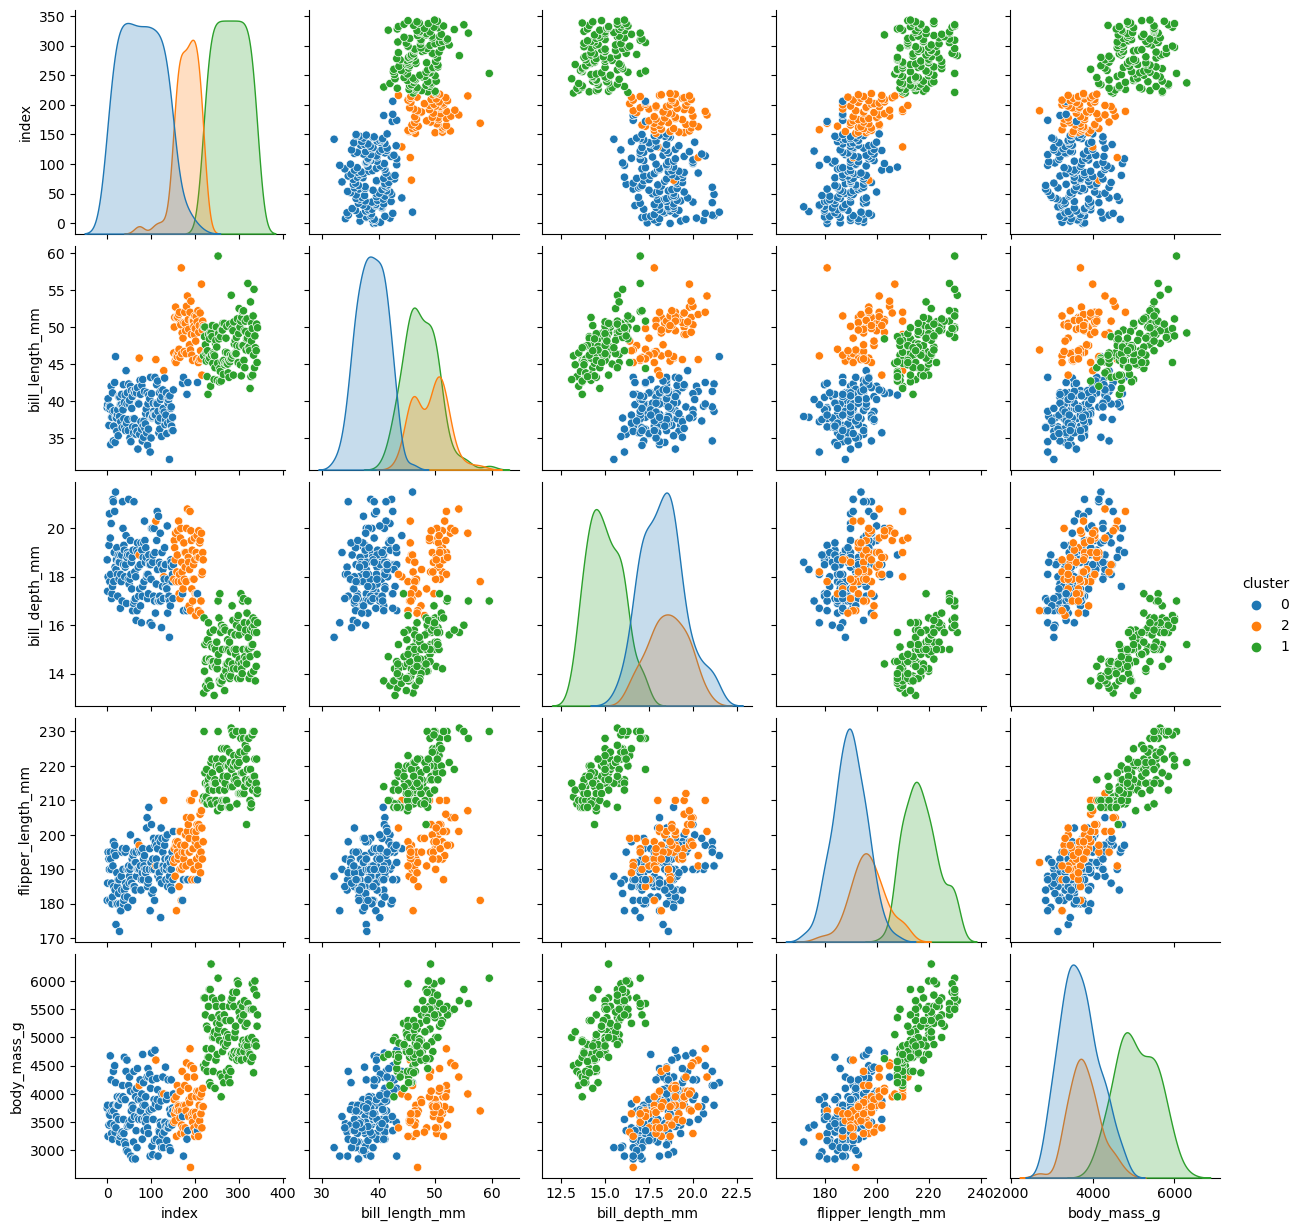

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = sns.load_dataset('penguins').drop(columns = ['island', 'sex']).dropna().reset_index()
X = df.drop(columns = 'species')
kmeans = KMeans(n_clusters=3, n_init = 'auto')
y_kmeans = kmeans.fit_predict(StandardScaler().fit_transform(X)).astype(str)

# Plot results
sns.pairplot(pd.concat([X, pd.Series(name = 'cluster', data = y_kmeans)], axis = 1), hue = 'cluster')
plt.show()

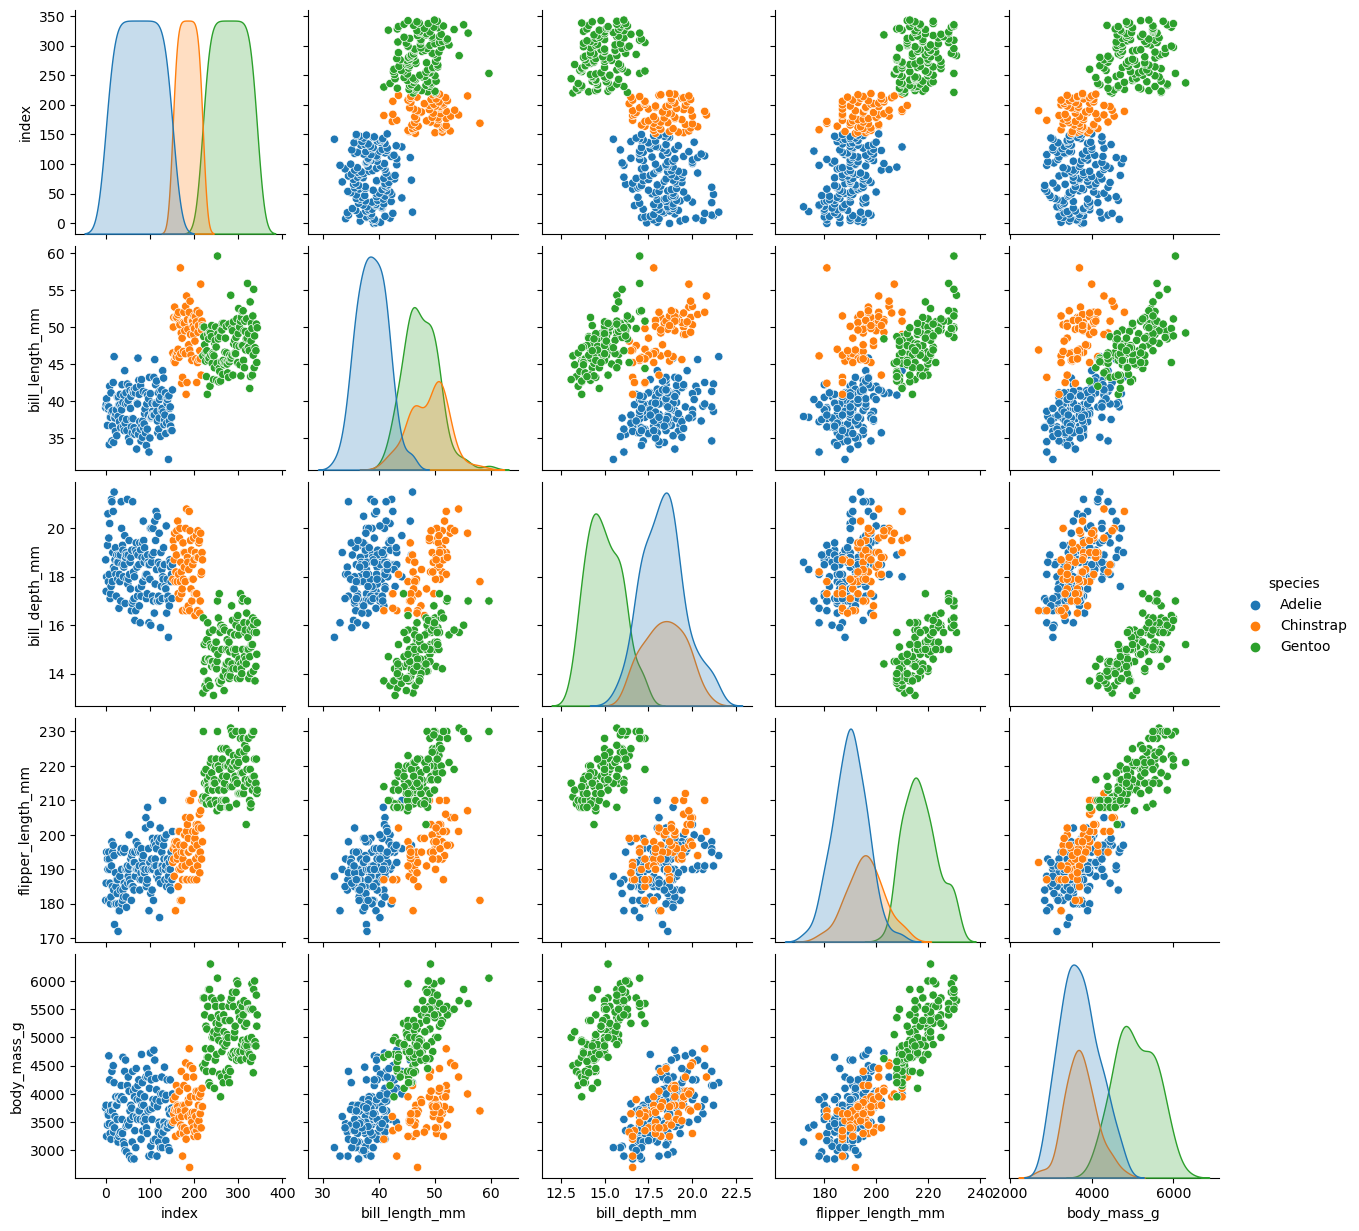

In [27]:
sns.pairplot(pd.concat([X, df['species']], axis = 1), hue = 'species')
plt.show()

### V-measure
Measures how well clusters map to known labels

homogeniety: degree to which each cluster only contains one predicted label (1 to 0 with 1 being perfectly homogenous)
completeness: dgree to which each predicted label is only assigned to one cluster (1 to 0 with 1 being perfectly complete)

v-measure = $\frac{2\space\times\space\text{homogeneity}\space\times\space\text{completeness}}{\text{homogeneity}\space+\space\text{completeness}}$

In [28]:
from sklearn.metrics import v_measure_score
v_measure_score(df['species'], y_kmeans)

0.9067497074897947

In [29]:
from sklearn.metrics import accuracy_score, f1_score
mapping = dict(
    pd.concat(
    (df['species'], pd.Series(y_kmeans, name = 'cluster')), axis = 1
    ).groupby('cluster')['species'].agg(pd.Series.mode)
)
y_pred = pd.Series(y_kmeans, name = 'cluster').map(mapping)

accuracy_score(df['species'], y_pred)

0.9766081871345029

In [30]:
f1_score(df['species'], y_pred, average= None)

array([0.97368421, 0.94029851, 1.        ])

## Other Types/Uses of Unsupervised Learning

- Dimensionality Reduction & Visualization 
    - PCA
    - tSNE

### PCA
Project datapoints onto a new set of orthogonal axes (principal components), such the projection of the datapoints onto the new axis is ordered from greatest to least variance. Because the later axes have such little variance, they can often be dropped without significantly impacting a model.
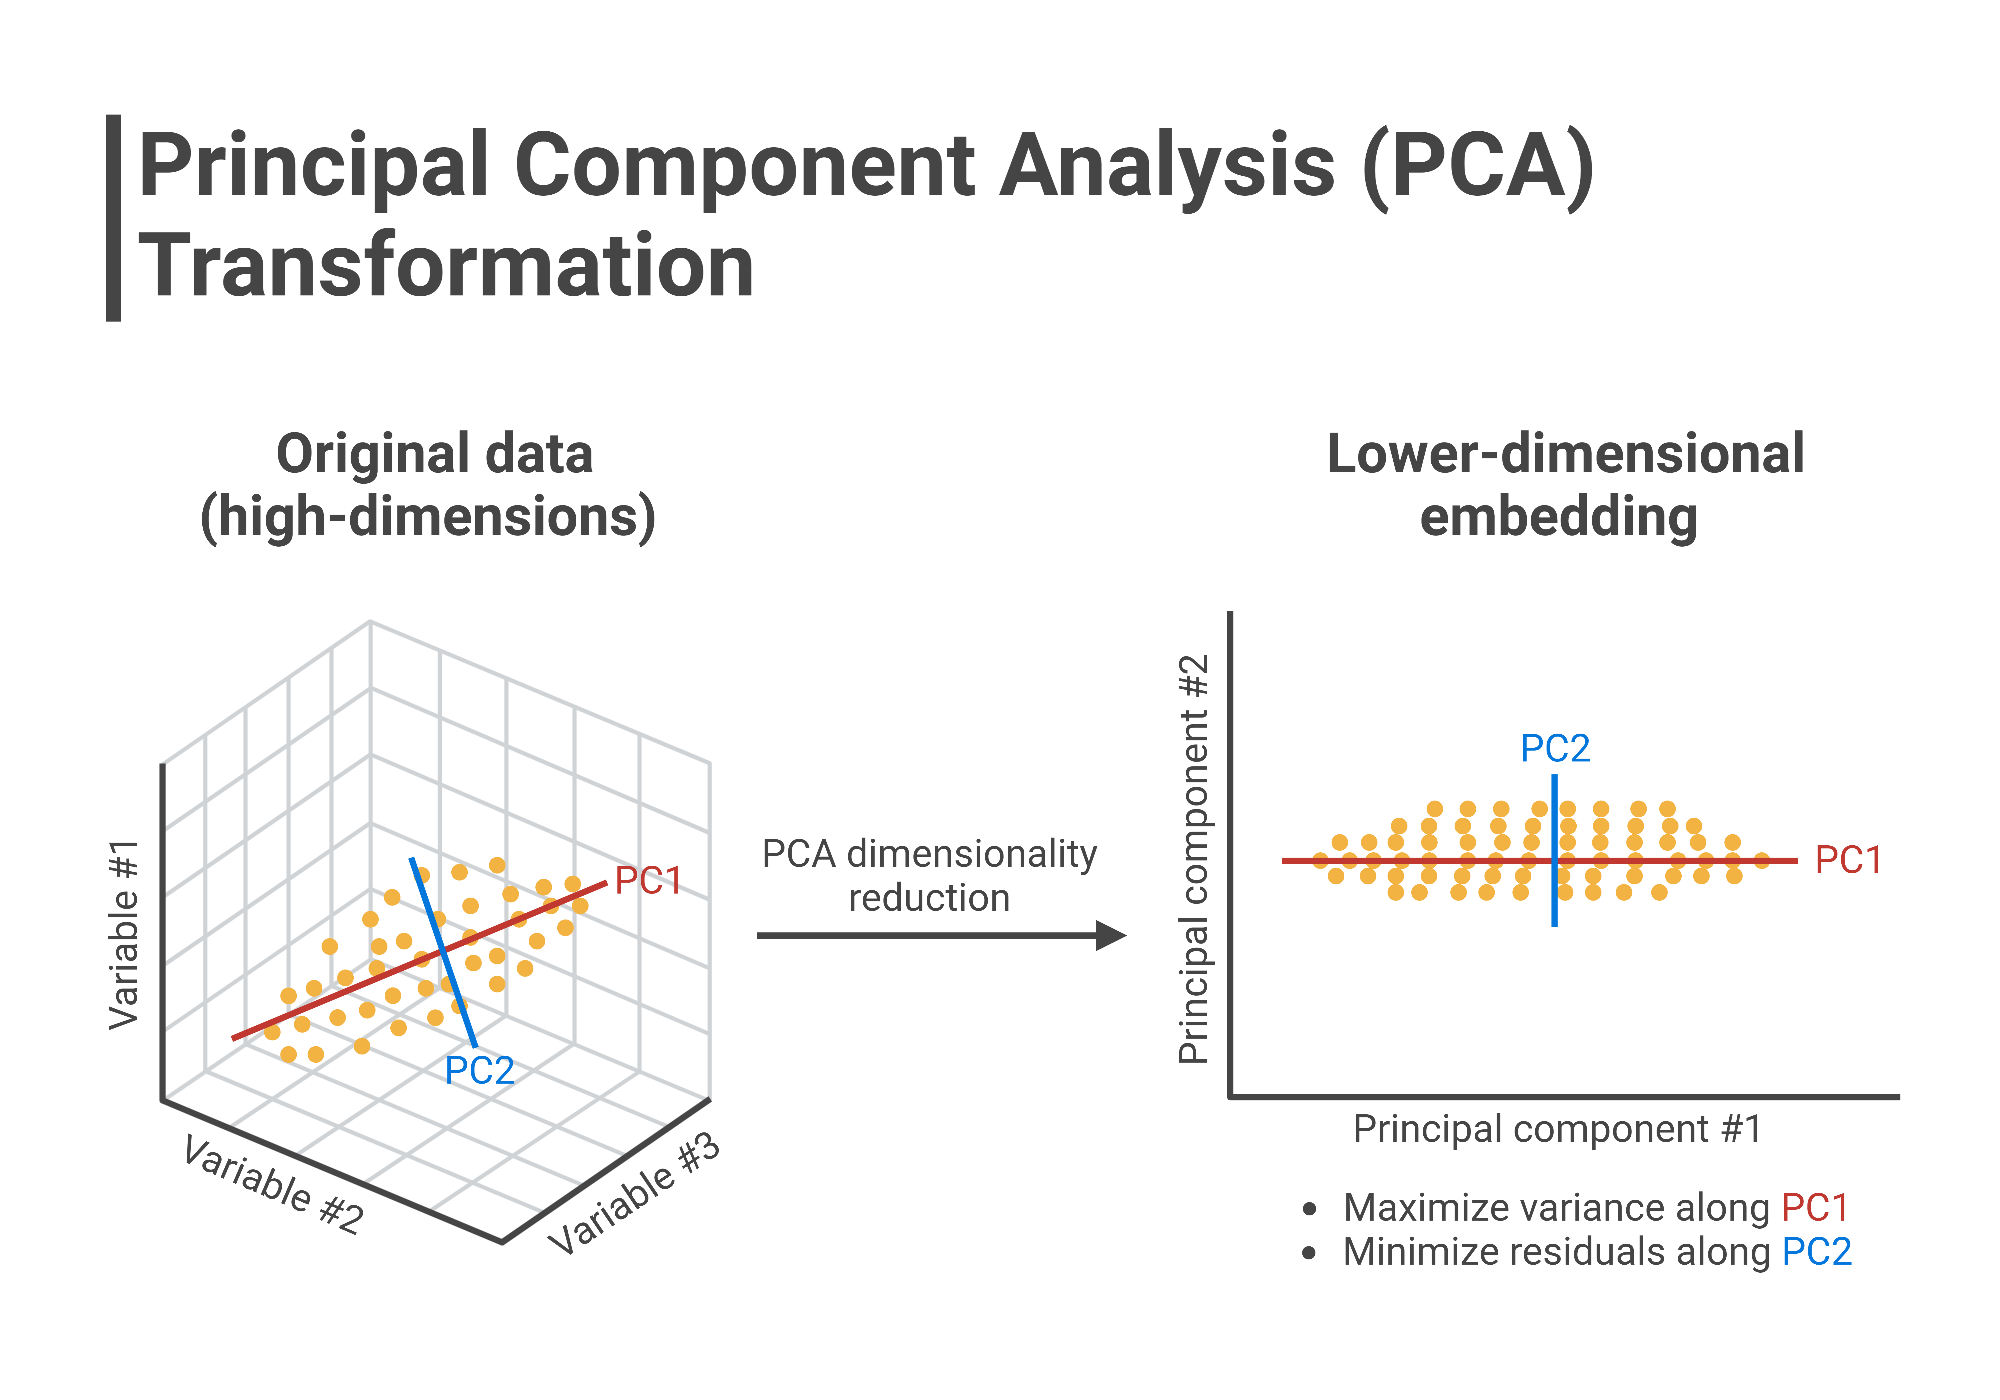
source: https://www.biorender.com/template/principal-component-analysis-pca-transformation

An illustrated explanation
https://setosa.io/ev/principal-component-analysis/

In [33]:
X_pca

array([[-2.46736546e+00,  8.92504933e-02],
       [-1.98484426e+00, -3.56383992e-01],
       [-2.02838231e+00, -9.98592568e-02],
       [-2.48102816e+00,  4.09590209e-02],
       [-2.51777803e+00,  8.67044021e-01],
       [-2.35686907e+00, -3.15199182e-01],
       [-1.56217168e+00,  6.53032602e-01],
       [-2.41525608e+00, -7.20145113e-01],
       [-1.87974221e+00,  1.10932545e+00],
       [-2.29685042e+00, -7.58207153e-01],
       [-2.31249432e+00, -6.28959062e-01],
       [-2.33658403e+00, -2.26370254e-01],
       [-2.51896283e+00,  1.04829057e+00],
       [-2.19582782e+00,  6.90177772e-01],
       [-2.29581398e+00, -5.52917352e-01],
       [-2.14698500e+00,  1.39786262e-01],
       [-1.50301586e+00,  1.41990358e+00],
       [-2.80543562e+00, -6.30964717e-01],
       [-1.66315274e+00,  2.06060347e+00],
       [-2.83925156e+00, -3.12779257e-01],
       [-2.58741312e+00, -1.13743040e-01],
       [-2.37256074e+00, -5.45505852e-02],
       [-2.05003364e+00, -2.20729372e-01],
       [-2.

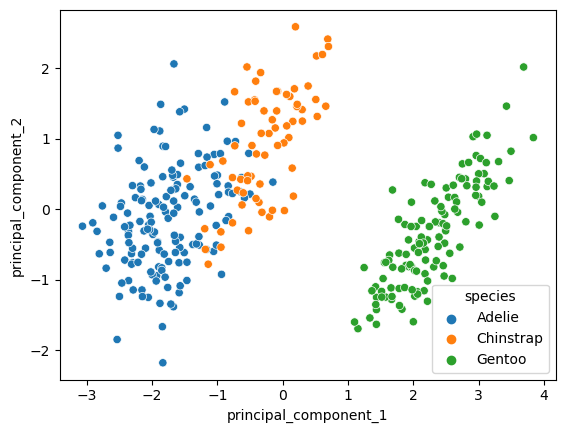

In [37]:
from sklearn.decomposition import PCA

df = sns.load_dataset('penguins').drop(columns = ['island', 'sex']).dropna().reset_index()
X = df.drop(columns = 'species')

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(columns = ['principal_component_1', 'principal_component_2'], data = X_pca)
df_pca['species'] = df['species']
# Plot results
sns.scatterplot(df_pca, x = 'principal_component_1', y = 'principal_component_2', hue = 'species')
plt.show()

t-SNE (t-Distributed Stochastic Neighbor Embedding)
Objective: Visualize high-dimensional data by reducing it to 2 or 3 dimensions.
Pros: Effective for visualization, preserves local structure.
Cons: Computationally expensive, sensitive to hyperparameters.

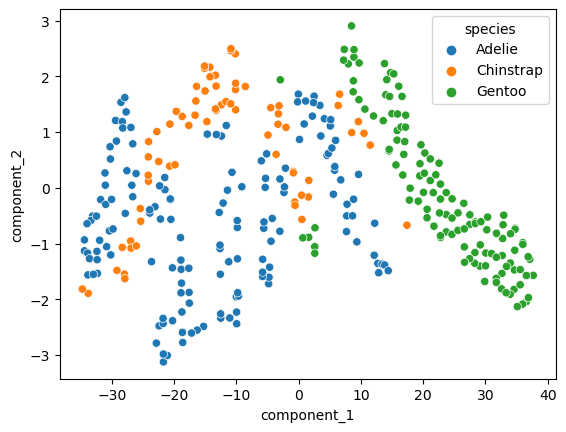

In [38]:
from sklearn.manifold import TSNE

# Generate sample data

# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(columns = ['component_1', 'component_2'], data = X_tsne)
df_tsne['species'] = df['species']
# Plot results
sns.scatterplot(df_tsne, x = 'component_1', y = 'component_2', hue = 'species')
plt.show()


### Anomaly Detection

- **Objective**: Identify rare items, events, or observations which raise suspicions by differing significantly from the majority of the data.
- **Techniques**:
  - Statistical methods
  - Proximity-based methods
  - Cluster-based methods


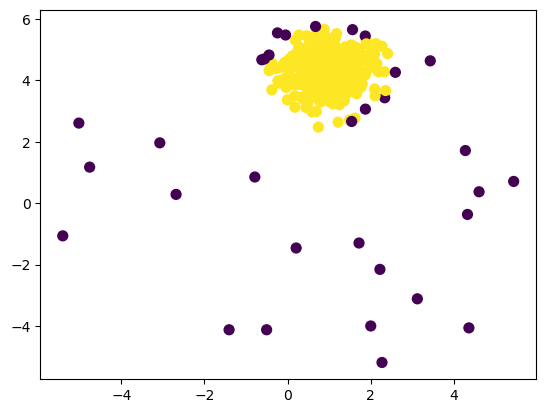

In [17]:

from sklearn.ensemble import IsolationForest

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.60, random_state=0)

# Add anomalies
X = np.vstack([X, np.random.uniform(low=-6, high=6, size=(20, 2))])

# Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
y_pred = iso_forest.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
plt.show()
